In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [228]:
df_2015=pd.read_csv('2015.csv')
df_2016=pd.read_csv('2016.csv')
df_2017=pd.read_csv('2017.csv')
df_2018=pd.read_csv('2018.csv')
df_2019=pd.read_csv('2019.csv')

In [229]:
# columns name change
df_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_2015.columns]
df_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_2016.columns]
df_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(".","_") for each in df_2017.columns]
df_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace("__","_") for each in df_2017.columns]
df_2018.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_2018.columns]
df_2019.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in df_2019.columns]

# 2015

In [230]:
df_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [231]:
df_2015.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard_Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [232]:
df_2015.shape

(158, 12)

In [233]:
df_2015.dtypes

Country               object
Region                object
Happiness_Rank         int64
Happiness_Score      float64
Standard_Error       float64
Economy              float64
Family               float64
Health               float64
Freedom              float64
Trust                float64
Generosity           float64
Dystopia_Residual    float64
dtype: object

### getting an overview of our data

In [234]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


### missing value control

In [235]:
df_2015.isnull().sum()

Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64

In [236]:
df_2015.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

### What are the happiness rates by region?

In [237]:
region_lists=list(df_2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=df_2015[df_2015['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


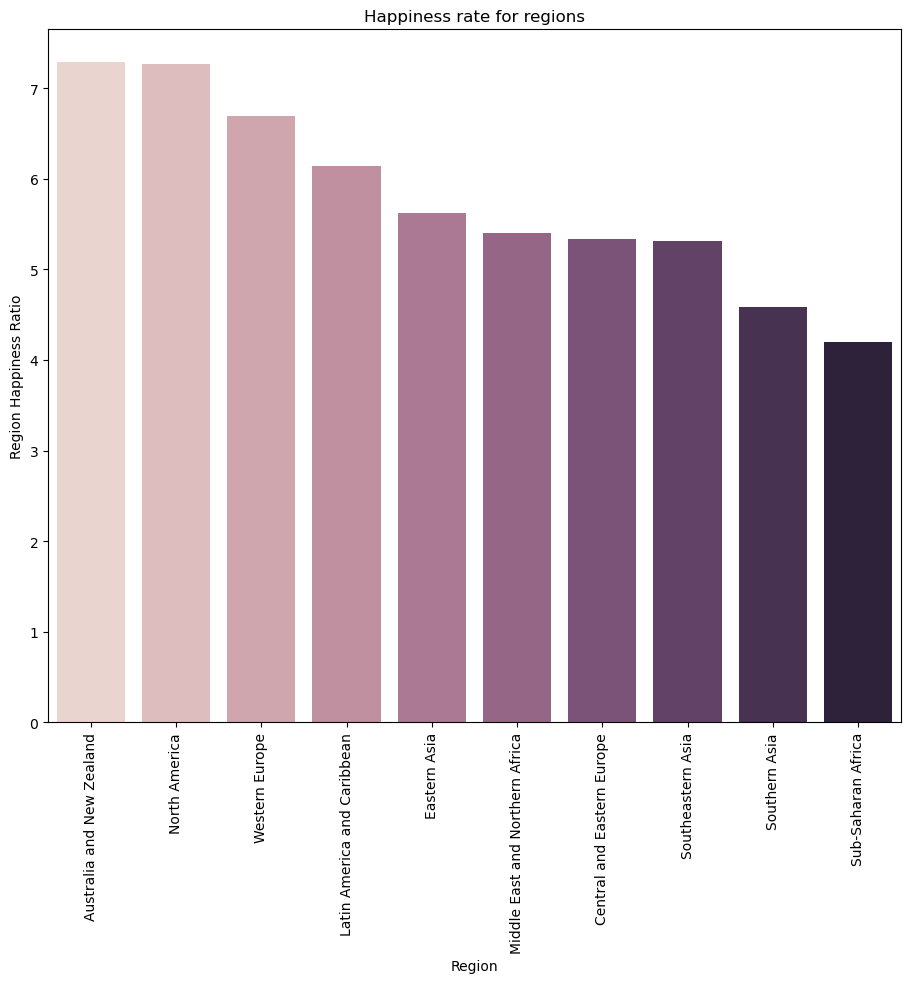

In [238]:
#Visualization
plt.figure(figsize=(11,9))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

### Which are the 10 happiest countries?

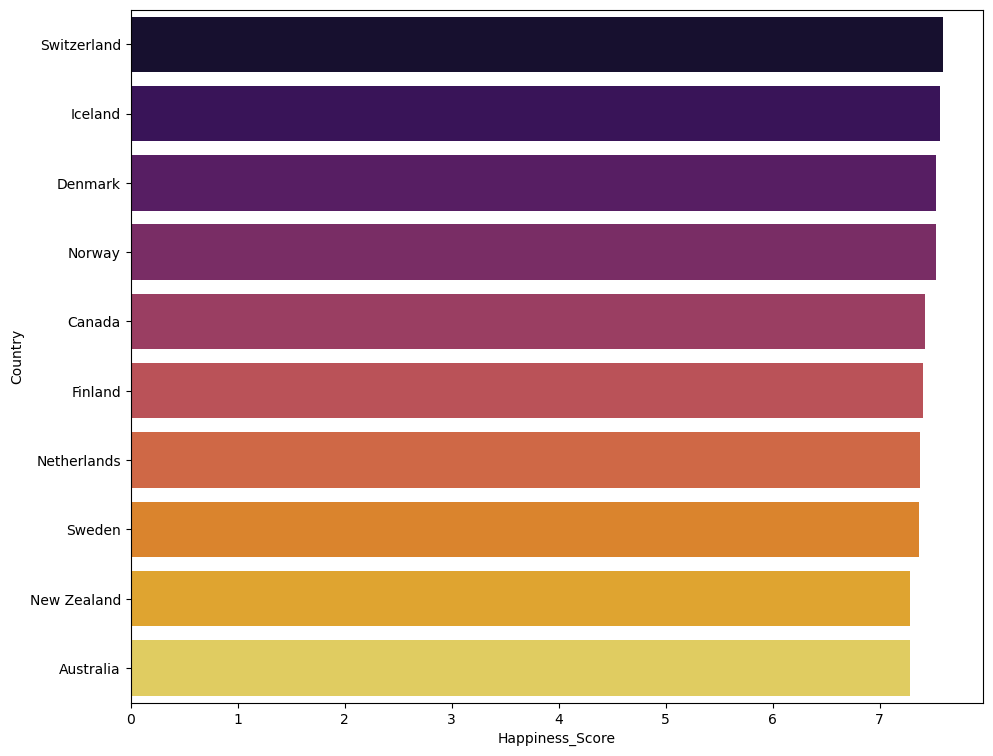

In [239]:
plt.figure(figsize=(11,9))
sns.barplot(y = df_2015["Country"][:10], x = df_2015["Happiness_Score"][:10],palette = "inferno")
plt.show()

### Which are the 10 most unhappy countries?

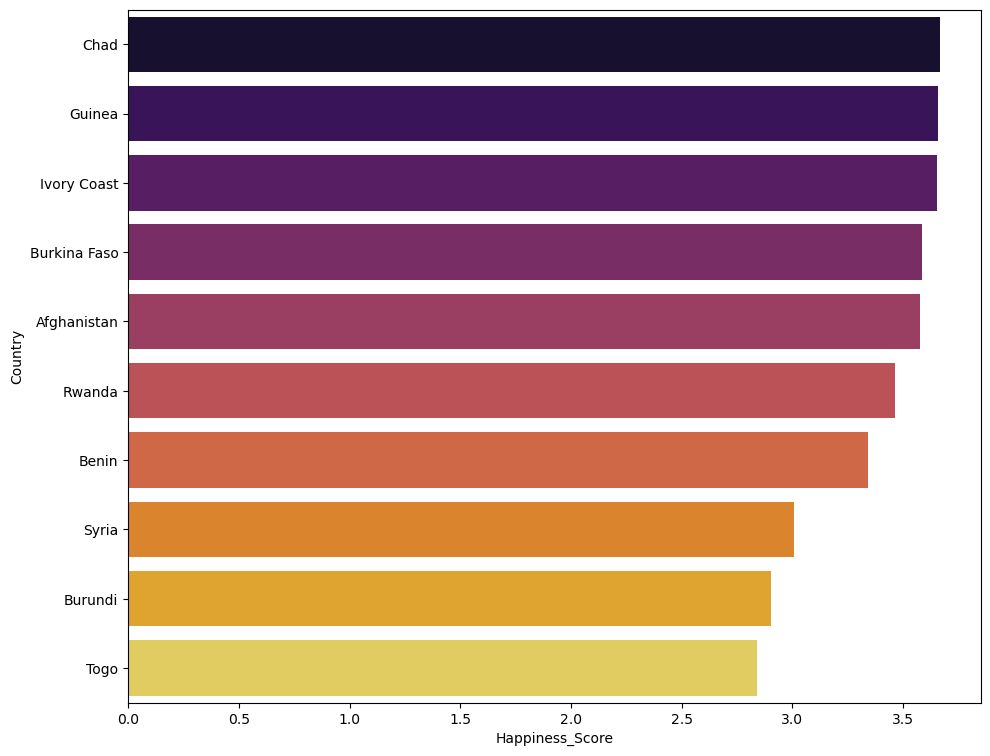

In [240]:
plt.figure(figsize=(11,9))
sns.barplot(y = df_2015["Country"][-10:], x = df_2015["Happiness_Score"][-10:],palette = "inferno")
plt.show()

### Which countries rank highest in each of the six factors that contribute to overall happiness and well-being?

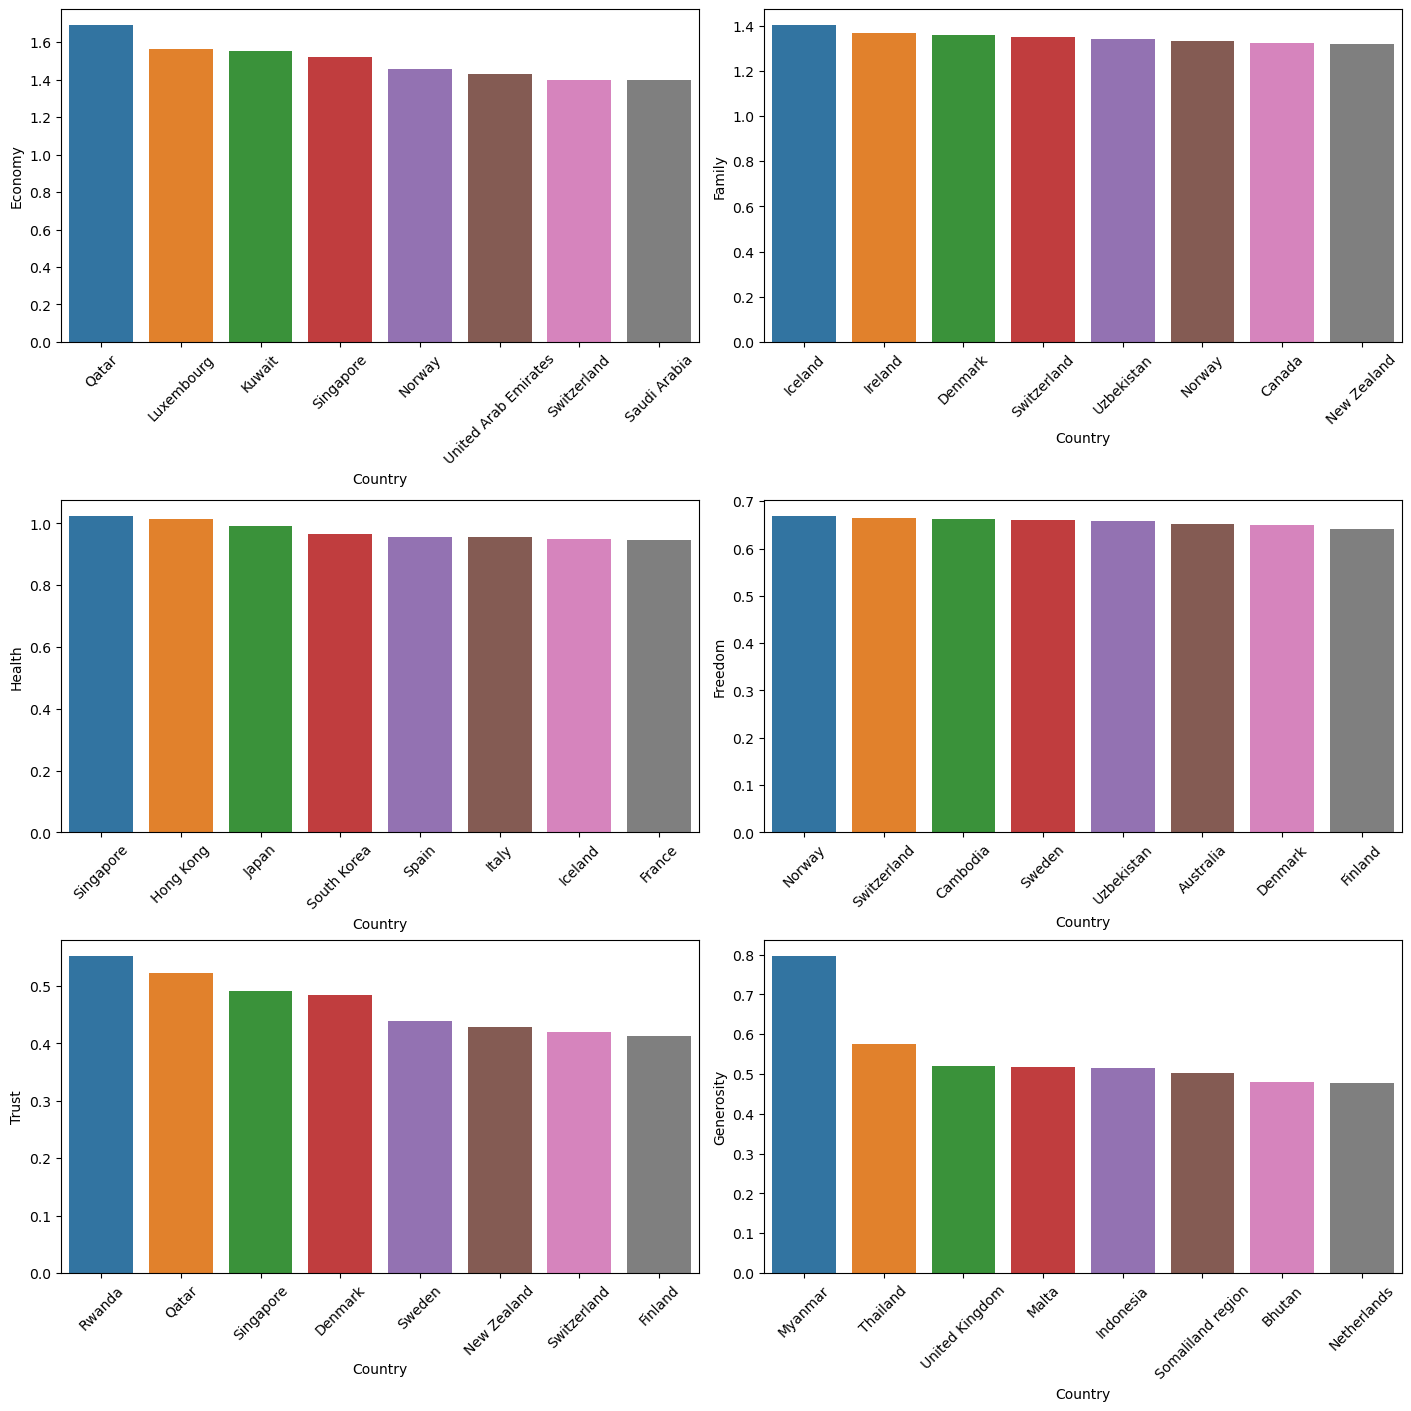

In [241]:
f, axs = plt.subplots(3,2, figsize = (14,14), constrained_layout = True)

sort_eco = df_2015.sort_values(by = ['Economy'], ascending = False)
sort_eco = sort_eco.head(8)
sort_fa = df_2015.sort_values(by = ['Family'], ascending = False)
sort_fa = sort_fa.head(8)
sort_he = df_2015.sort_values(by = ['Health'], ascending = False)
sort_he = sort_he.head(8)
sort_free = df_2015.sort_values(by = ['Freedom'], ascending = False)
sort_free = sort_free.head(8)
sort_gc = df_2015.sort_values(by = ['Trust'], ascending = False)
sort_gc = sort_gc.head(8)
sort_genero = df_2015.sort_values(by = ['Generosity'], ascending = False)
sort_genero = sort_genero.head(8)

ax=sns.barplot(x="Country", y="Economy", data=sort_eco, ax = axs[0, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Family", data=sort_fa, ax = axs[0, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Health", data=sort_he, ax = axs[1, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Freedom", data=sort_free, ax = axs[1, 1])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Trust", data = sort_gc, ax = axs[2, 0])
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Generosity", data=sort_genero, ax = axs[2, 1])
ax.tick_params(axis = 'x', rotation = 45)

### What is the ratio of the factors affecting the Happiness Score according to the regions?

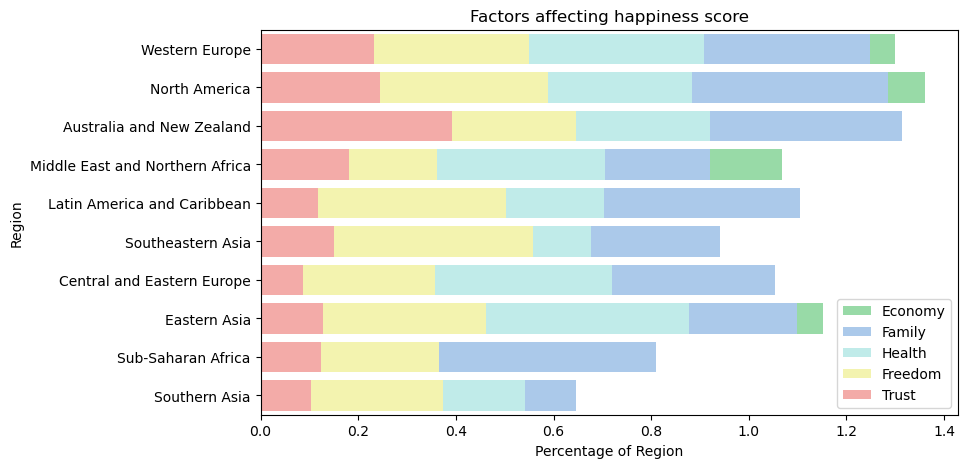

In [242]:
region_lists=list(df_2015['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=df_2015[df_2015['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))
#Visualization
f,ax = plt.subplots(figsize = (9,5))
sns.set_color_codes("pastel")
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

# 2016-2017-2018-2019

In [243]:
df_2016.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score', 'Lower',
       'Upper', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

In [244]:
df_2017=df_2017.rename(columns={"Economy_GDP_per_Capita_":"Economy","Health_Life_Expectancy_":"Healty",
                      "Trust_Government_Corruption_":"Trust"
                      })

In [245]:
df_2017.columns

Index(['Country', 'Happiness_Rank', 'Happiness_Score', 'Whisker_high',
       'Whisker_low', 'Economy', 'Family', 'Healty', 'Freedom', 'Generosity',
       'Trust', 'Dystopia_Residual'],
      dtype='object')

In [246]:
df_2018=df_2018.rename(columns={"GDP":"Economy","Overall_rank":"Happiness_Rank","Score":"Happiness_Score"})

In [247]:
df_2018.columns

Index(['Happiness_Rank', 'Country', 'Happiness_Score', 'Economy',
       'Social_support', 'Healthy', 'Freedom', 'Generosity', 'Perceptions'],
      dtype='object')

In [248]:
df_2019=df_2019.rename(columns={"GDP":"Economy","Overall_rank":"Happiness_Rank","Score":"Happiness_Score"})

In [249]:
df_2019.columns

Index(['Happiness_Rank', 'Country', 'Happiness_Score', 'Economy',
       'Social_support', 'Healthy', 'Freedom', 'Generosity', 'Perceptions'],
      dtype='object')

In [250]:
df_2019.head()

,Happiness_Rank,Country,Happiness_Score,Economy,Social_support,Healthy,Freedom,Generosity,Perceptions
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### What are the 8 happiest and unhappiest countries by year?

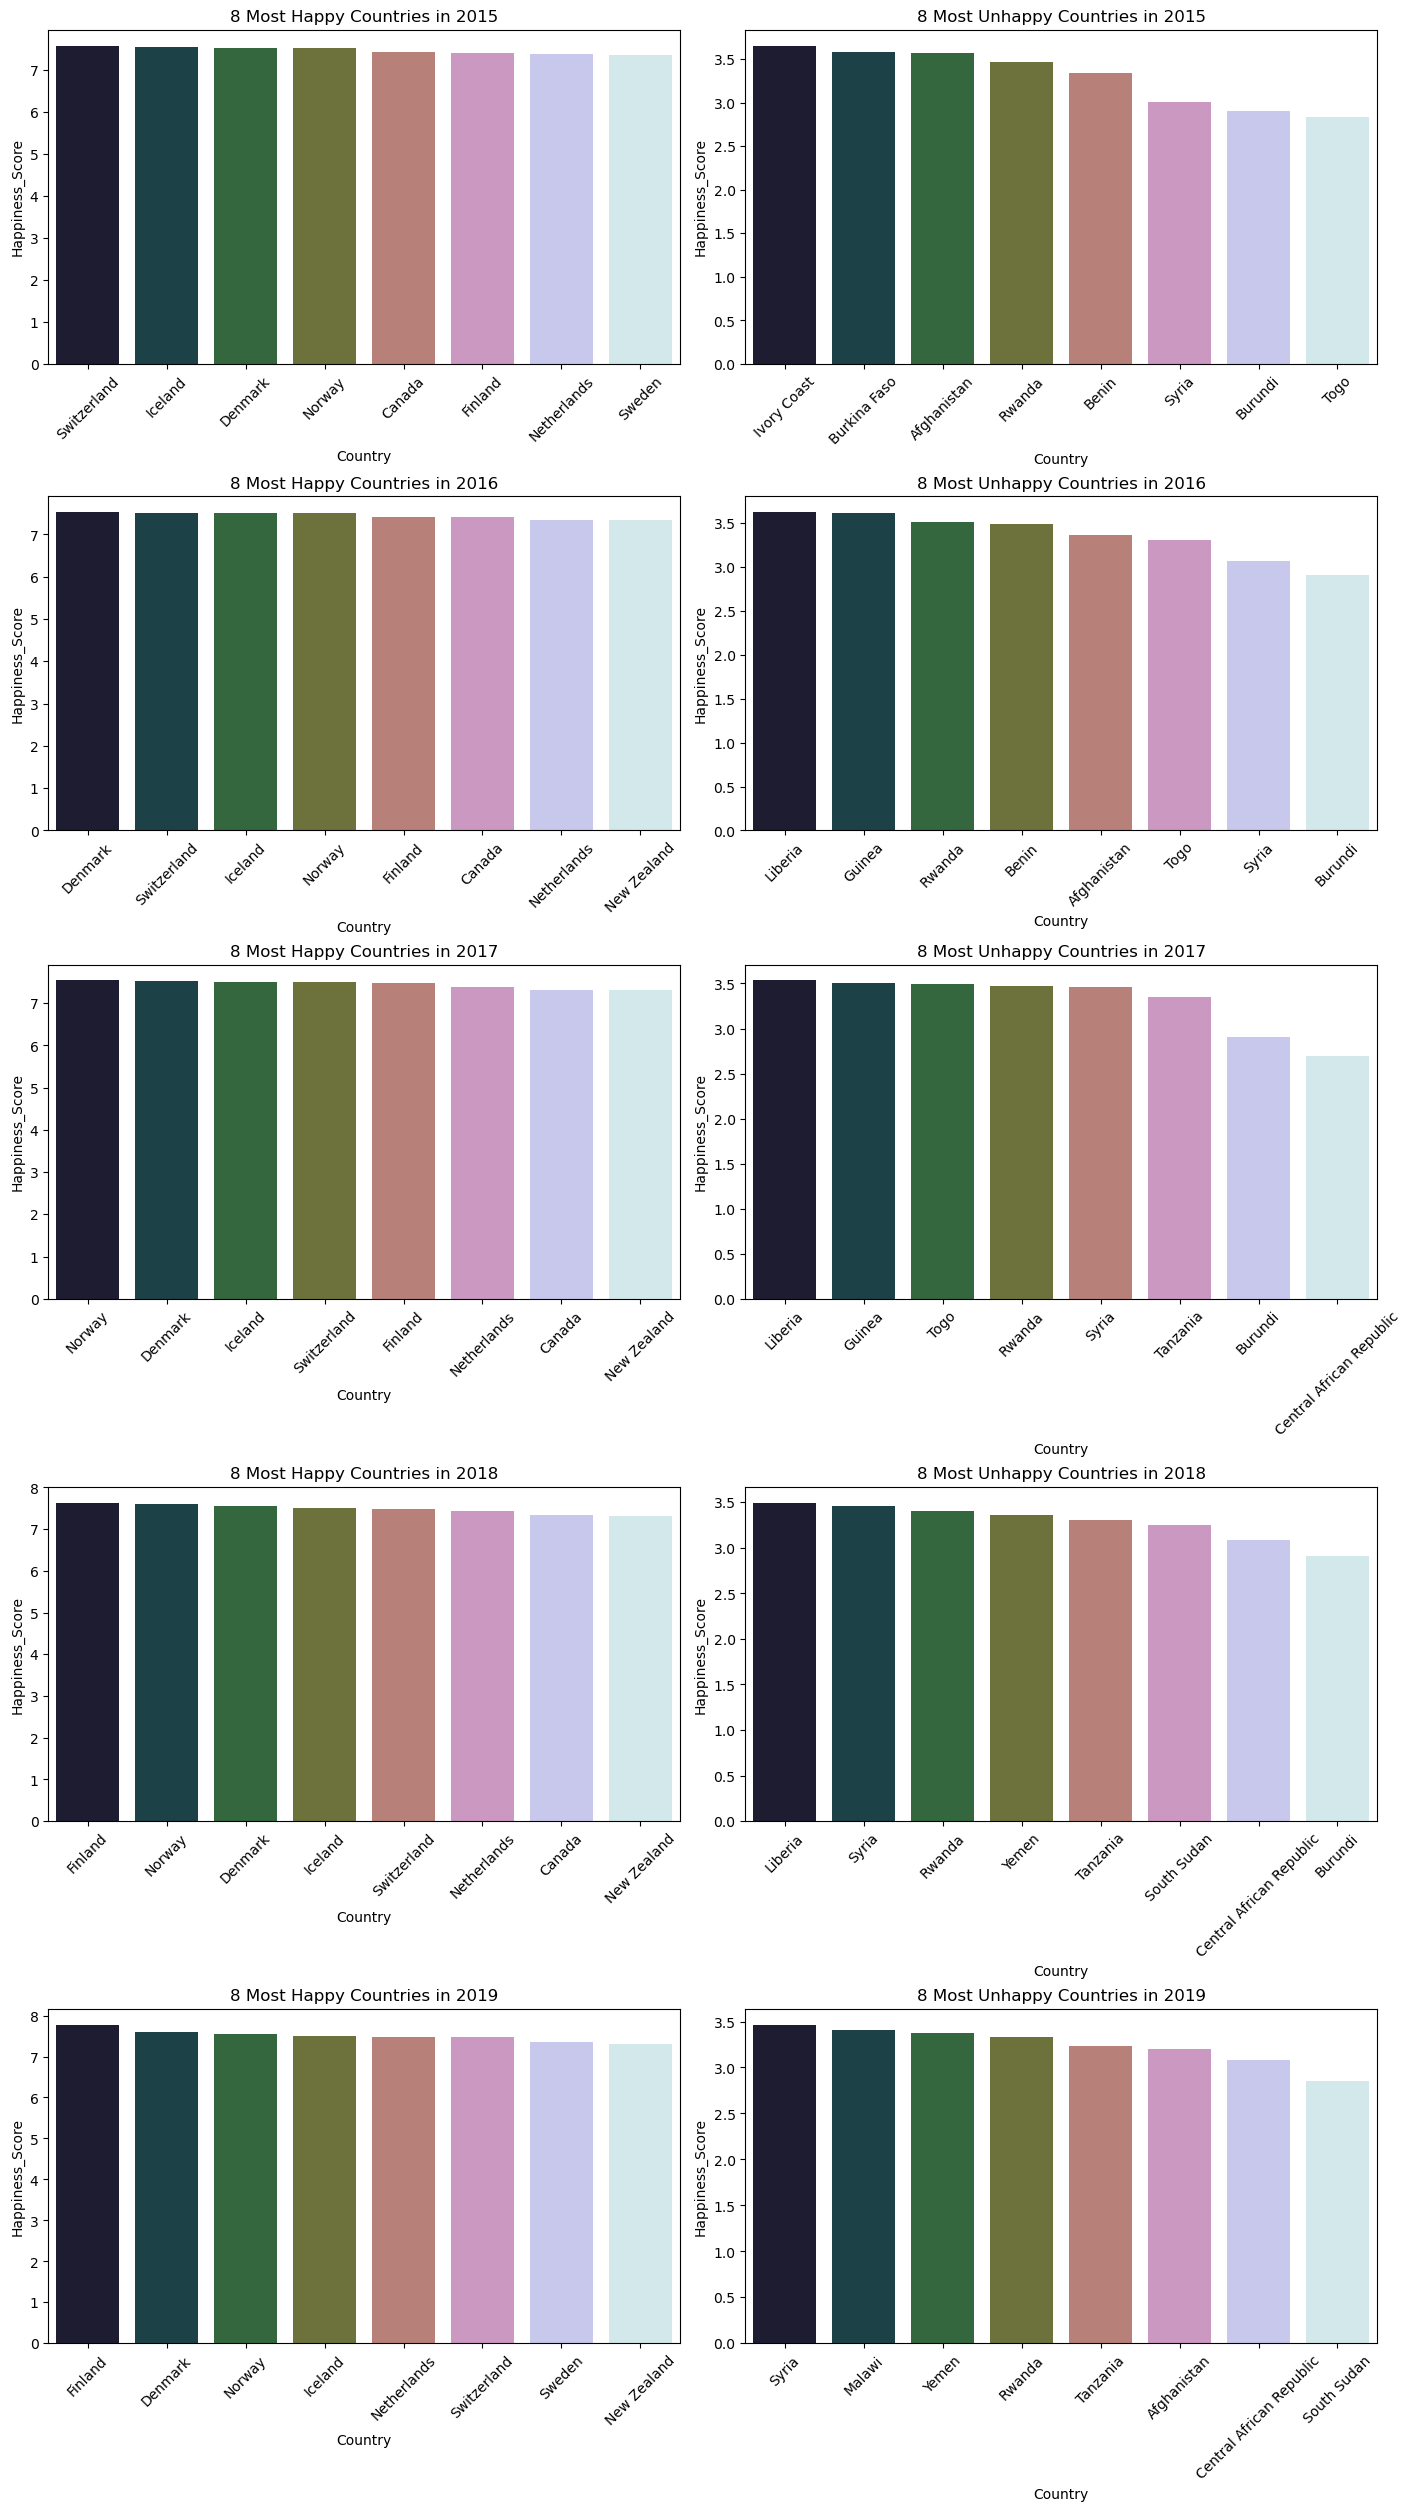

In [251]:
sort_df_2015 = df_2015.head(8)
sad_df_2015 = df_2015.tail(8)
sort_df_2016 = df_2016.head(8)
sad_df_2016 = df_2016.tail(8)
sort_df_2017 = df_2017.head(8)
sad_df_2017 = df_2017.tail(8)
sort_df_2018 = df_2018.head(8)
sad_df_2018 = df_2018.tail(8)
sort_df_2019 = df_2019.head(8)
sad_df_2019 = df_2019.tail(8)
f, axs = plt.subplots(5,2, figsize = (14,25), constrained_layout = True)
ax=sns.barplot(x="Country", y="Happiness_Score", data=sort_df_2015 , ax = axs[0, 0],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sad_df_2015, ax = axs[0, 1],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df_2016, ax = axs[1, 0],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sad_df_2016, ax = axs[1, 1],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df_2017, ax = axs[2, 0],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sad_df_2017, ax = axs[2, 1],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data=sort_df_2018, ax = axs[3, 0],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sad_df_2018, ax = axs[3, 1],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sort_df_2019, ax = axs[4, 0],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
ax=sns.barplot(x="Country",y="Happiness_Score", data =sad_df_2019, ax = axs[4, 1],palette="cubehelix")
ax.tick_params(axis = 'x', rotation = 45)
axs[0, 0].title.set_text('8 Most Happy Countries in 2015')
axs[0, 1].title.set_text('8 Most Unhappy Countries in 2015')
axs[1, 0].title.set_text('8 Most Happy Countries in 2016')
axs[1, 1].title.set_text('8 Most Unhappy Countries in 2016')
axs[2, 0].title.set_text('8 Most Happy Countries in 2017')
axs[2, 1].title.set_text('8 Most Unhappy Countries in 2017')
axs[3, 0].title.set_text('8 Most Happy Countries in 2018')
axs[3, 1].title.set_text('8 Most Unhappy Countries in 2018')
axs[4, 0].title.set_text('8 Most Happy Countries in 2019')
axs[4, 1].title.set_text('8 Most Unhappy Countries in 2019')

In [252]:
df=pd.merge(df_2015,df_2016,on="Country",suffixes=("_2015","_2016"))

In [253]:
df2=pd.merge(df,df_2017,on="Country",suffixes=("_2016","_2017"))

In [254]:
df3=pd.merge(df2,df_2018,on="Country",suffixes=("_2017","_2018"))

In [255]:
df4=pd.merge(df3,df_2019,on="Country",suffixes=("_2018","_2019"))

In [256]:
df4.head()

,Country,Region_2015,Happiness_Rank_2015,Happiness_Score_2015,Standard_Error,Economy_2015,Family_2015,Health_2015,Freedom_2015,Trust_2015,...,Generosity_2018,Perceptions_2018,Happiness_Rank,Happiness_Score,Economy,Social_support_2019,Healthy_2019,Freedom,Generosity,Perceptions_2019
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,0.256,0.357,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,0.353,0.138,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,0.284,0.408,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,0.286,0.340,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,0.321,0.291,9,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [257]:
df4.columns

Index(['Country', 'Region_2015', 'Happiness_Rank_2015', 'Happiness_Score_2015',
       'Standard_Error', 'Economy_2015', 'Family_2015', 'Health_2015',
       'Freedom_2015', 'Trust_2015', 'Generosity_2015',
       'Dystopia_Residual_2015', 'Region_2016', 'Happiness_Rank_2016',
       'Happiness_Score_2016', 'Lower', 'Upper', 'Economy_2016', 'Family_2016',
       'Health_2016', 'Freedom_2016', 'Trust_2016', 'Generosity_2016',
       'Dystopia_Residual_2016', 'Happiness_Rank_2017', 'Happiness_Score_2017',
       'Whisker_high', 'Whisker_low', 'Economy_2017', 'Family', 'Healty',
       'Freedom_2017', 'Generosity_2017', 'Trust', 'Dystopia_Residual',
       'Happiness_Rank_2018', 'Happiness_Score_2018', 'Economy_2018',
       'Social_support_2018', 'Healthy_2018', 'Freedom_2018',
       'Generosity_2018', 'Perceptions_2018', 'Happiness_Rank',
       'Happiness_Score', 'Economy', 'Social_support_2019', 'Healthy_2019',
       'Freedom', 'Generosity', 'Perceptions_2019'],
      dtype='object'

In [258]:
df = df4[["Country","Happiness_Score_2015","Happiness_Score_2016","Happiness_Score_2017","Happiness_Score_2018","Happiness_Score"]]
df= df.rename(columns = {"Happiness_Score":"Happiness_Score_2019"})

In [259]:
df.head()

,Country,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017,Happiness_Score_2018,Happiness_Score_2019
0,Switzerland,7.587,7.509,7.494,7.487,7.480
1,Iceland,7.561,7.501,7.504,7.495,7.494
2,Denmark,7.527,7.526,7.522,7.555,7.600
3,Norway,7.522,7.498,7.537,7.594,7.554
4,Canada,7.427,7.404,7.316,7.328,7.278


### How did happiness scores change between 2015 and 2019?

In [260]:
x=df['Happiness_Score_2015']-df["Happiness_Score_2019"].round(3)

In [261]:
df['Score_Changes']=x

In [262]:
df.head()

,Country,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017,Happiness_Score_2018,Happiness_Score_2019,Score_Changes
0,Switzerland,7.587,7.509,7.494,7.487,7.480,0.107
1,Iceland,7.561,7.501,7.504,7.495,7.494,0.067
2,Denmark,7.527,7.526,7.522,7.555,7.600,-0.073
3,Norway,7.522,7.498,7.537,7.594,7.554,-0.032
4,Canada,7.427,7.404,7.316,7.328,7.278,0.149


In [263]:
df = df.sort_values(by = ['Score_Changes'], ascending = [False])

In [264]:
df.head(10)

,Country,Happiness_Score_2015,Happiness_Score_2016,Happiness_Score_2017,Happiness_Score_2018,Happiness_Score_2019,Score_Changes
21,Venezuela,6.810,6.084,5.250,4.806,4.707,2.103
78,Zambia,5.129,4.795,4.514,4.377,4.107,1.022
102,Zimbabwe,4.610,4.193,3.875,3.692,3.663,0.947
105,Haiti,4.518,4.028,3.603,3.582,3.597,0.921
116,Malawi,4.292,4.156,3.970,3.587,3.410,0.882
113,Botswana,4.332,3.974,3.766,3.590,3.488,0.844
121,Yemen,4.077,3.724,3.593,3.355,3.380,0.697
15,Brazil,6.983,6.952,6.635,6.419,6.300,0.683
103,Liberia,4.571,3.622,3.533,3.495,3.975,0.596
13,Mexico,7.187,6.778,6.578,6.488,6.595,0.592


### Which Countries Have The Most Rising and Falling Happiness Scores?

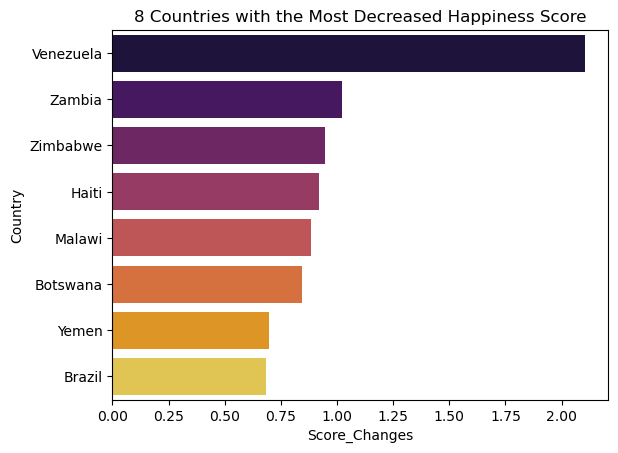

In [265]:
sns.barplot(y = df["Country"][:8], x = df["Score_Changes"][:8],palette="inferno")
plt.title('8 Countries with the Most Decreased Happiness Score')
plt.show()

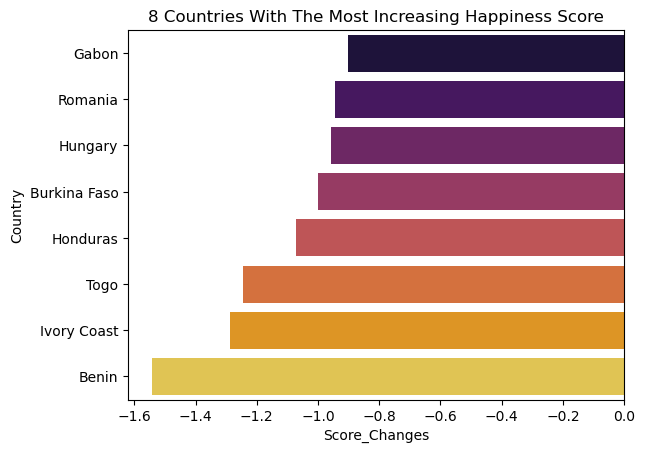

In [266]:
sns.barplot(y = df["Country"][-8:], x = df["Score_Changes"][-8:],palette="inferno")
plt.title('8 Countries With The Most Increasing Happiness Score')
plt.show()

### Which Countries Have the Most and Least Changed in Absolute Happiness Score?

In [267]:
absolute_score=list(map(abs, df['Score_Changes']))
absolute_score = np.array(absolute_score, dtype=np.float32).round(3)

In [268]:
df['Absolute_Score']=absolute_score
df=df.sort_values('Absolute_Score')

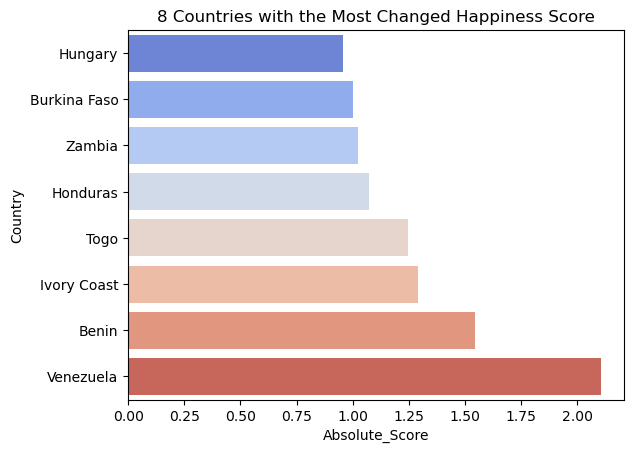

In [269]:
sns.barplot(y = df["Country"][-8:], x = df["Absolute_Score"][-8:],palette="coolwarm")
plt.title('8 Countries with the Most Changed Happiness Score')
plt.show()

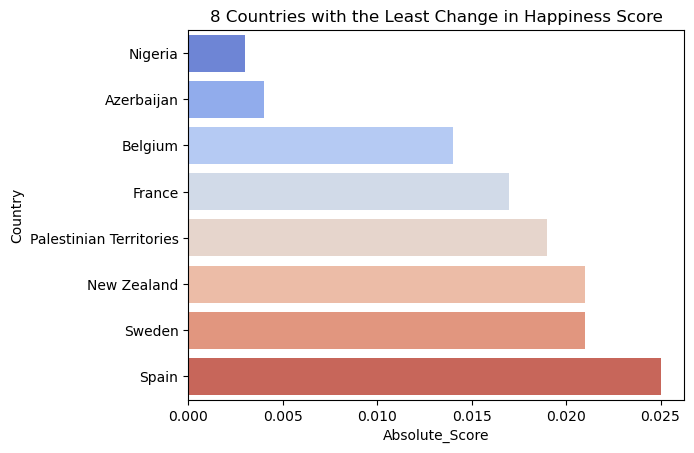

In [270]:
sns.barplot(y = df["Country"][:8], x = df["Absolute_Score"][:8],palette="coolwarm")
plt.title('8 Countries with the Least Change in Happiness Score')
plt.show()